# DS 3000 - Assignment [7]

**Student Name**: Evelyn Yaskin

**Date**: 02/21/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

TODO: Copy/Paste the instructions for this question.


1. Load the attached data into a pandas dataframe: diamonds.csv Download diamonds.csv 
This dataset contains the price of diamonds based on various attributes. For more information about the variables, read the description on kaggle.comLinks to an external site.

In [18]:
import pandas as pd

# Loading the dataframe from the csv file.
df = pd.read_csv("diamonds.csv")

# Showing the first 5 rows of data.
# df.head()

# Converting data types to correct values.
df['cut'] = df['cut'].astype('string')
df['color'] = df['color'].astype('string')
df['clarity'] = df['clarity'].astype('string')

#Making sure the data is all positive. 
df = df[
    (df['carat'] > 0) &
    (df['depth'] > 0) &
    (df['table'] > 0) &
    (df['price'] > 0) &
    (df['x'] > 0) &
    (df['y'] > 0) &
    (df['z'] > 0)]

#Dropping the unnamed column. 
df.drop(columns=['Unnamed: 0'], inplace=True)

print(df.dtypes)

#Checking the data for any duplicates.
duplicates = df[df.duplicated()]
print("Number of duplicated rows:", len(duplicates))

df.head()

carat             float64
cut        string[python]
color      string[python]
clarity    string[python]
depth             float64
table             float64
price               int64
x                 float64
y                 float64
z                 float64
dtype: object
Number of duplicated rows: 145


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2. (5 pts) Select any two variables of your choice and explain its statistical summary, e.g. mean, median, min, max, etc.

In [2]:
import numpy as np

#Showing descriptions of the data. 
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From this description, we can see that the mean weight of the carat of diamonds is approximately 0.798 carats. The median is 0.700 carats, meaning that half of the 
diamonds have a weight below this value and the other half above. The range is then from 0.200 to 5.010 carats. The standard deviation is 0.474011 which suggests that the carat weights are spread out from the mean, showing some variability in the dataset. 

With the price, the mean is about $3932.80. The median price is 2401.00, showing that half of the diamonds have a price below this value, and the other half above. The range is from 326.00 to 18823.00. The standard deviation is 3989.44 which suggests that the prices are pretty spread out from the mean, showing some variability. The high maximum value then suggests the presence of some outliers in the price distribution. 

3. (5 pts) Create a bar chart that shows the frequency of diamonds grouped by cut. Explain the chart.

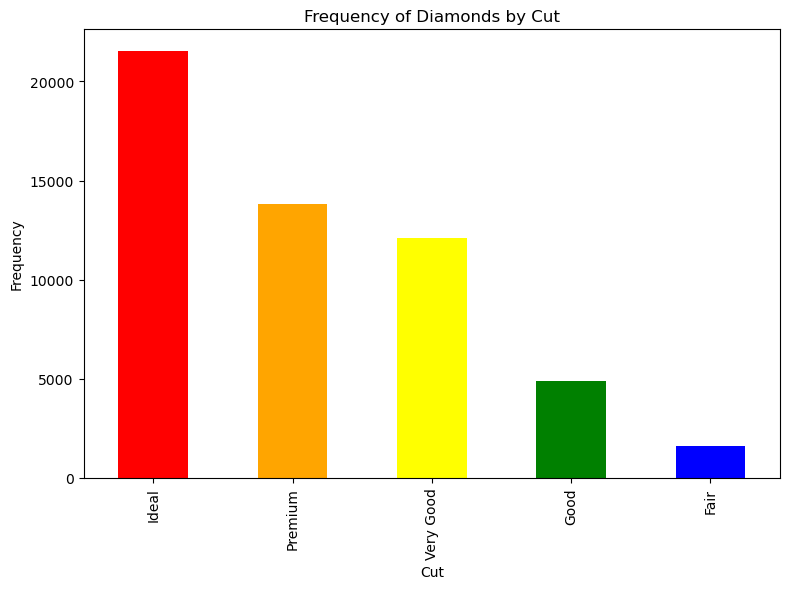

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#Counting values in the cuts row. 
cut_counts = df['cut'].value_counts()

color = ['red', 'orange', 'yellow', 'green', 'blue']

#Creating bar graph. 
plt.figure(figsize=(8, 6))
cut_counts.plot(kind='bar', color=color)
plt.title('Frequency of Diamonds by Cut')
plt.xlabel('Cut')
plt.ylabel('Frequency')

#Showing the graph. 
plt.tight_layout()
plt.show()

This graph represents the distribution of frequency of different diamonds by their cut types. From this bar chart, we can see that the frequency of diamonds by its cut is pretty spread out amongst cuts. The most frequent cut is ideal, with fair being the least common. 

4. (5 pts) Create a scatterplot that shows the relationship between carat and price. Explain the chart and comment on the relationship between the variables.

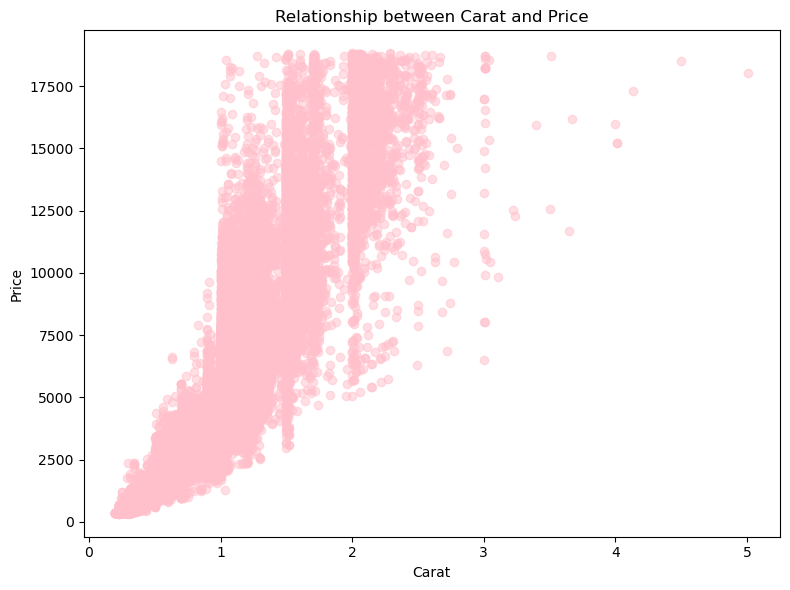

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

#Creating a scatterplot, and setting alpha to 0.5.
plt.figure(figsize=(8, 6))
plt.scatter(df['carat'], df['price'], color='pink', alpha=0.5)

plt.title('Relationship between Carat and Price')
plt.xlabel('Carat')
plt.ylabel('Price')

#Showing the graph. 
plt.tight_layout()
plt.show()

This scatterplot represents the correlation between the carat weight and price of diamonds. The x-value represents the carat weight in grams, and the y-value is the price in dollars. From this graph, we can see that generally with a higher carat weight, the weight also increases. However, we can also see that there are some outliers in the data, as the carat weight increases. 

5. (10 pts) Calculate the Pearson Correlation coefficient of carat and price. Explain the results and discuss the strength of the correlation.

In [20]:
from scipy.stats import pearsonr

# Calculating the pearson/correlation coefficient between carat weights and prices.
corr, p_value = pearsonr(df['carat'], df['price'])

# Round the correlation coefficient to 2 decimal places
rounded_corr = round(corr, 2)

# Printing out the values.
print('The correlation coefficient is:', rounded_corr)
print('The p-value is:', p_value)

The correlation coefficient is: 0.92
The p-value is: 0.0


Since the correlation coefficient is approximately 0.922, this 
indicates a strong positive correlation betwee the carat and the price.
Because the p-value is 0, this means that the correlation coefficient is statistically significant. The probability of this strong correlation coefficient being under the null hypothesis, is basically zero. Overall, the results indicate that the carat weight is an important factor is confirming the price of diamonds for this dataset. 

6. (15 pts) Create a histogram (or boxplot) that shows the distribution of prices based on the quality of the cut. Explain the charts and skew.

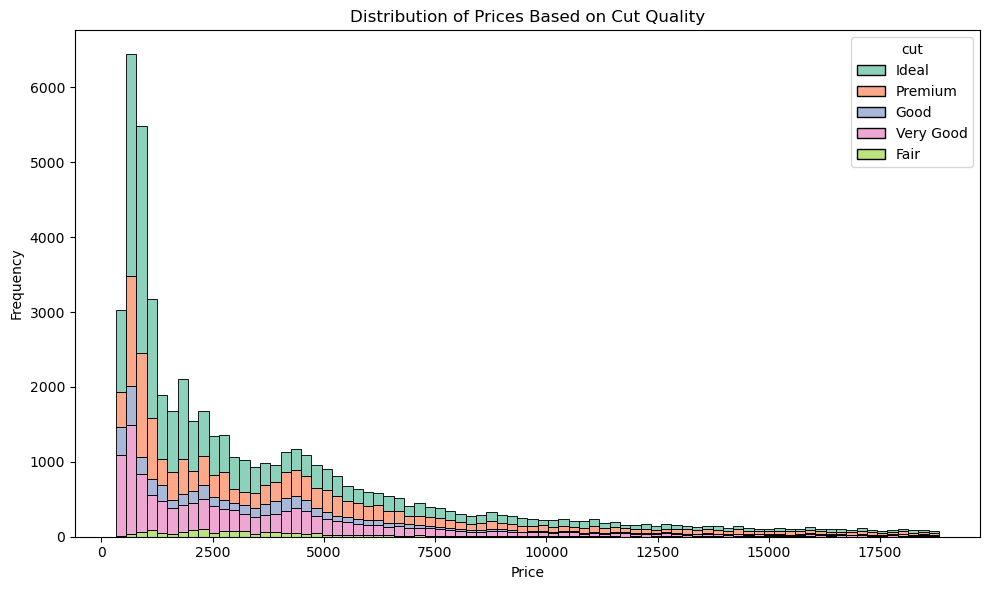

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='cut', palette='Set2', multiple='stack')

plt.title('Distribution of Prices Based on Cut Quality')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Showing the graph. 
plt.tight_layout()
plt.show()

This graph shows the distribution of diamond prices based on their cut quality. From this, we can see that the ideal is the most frequent with frequencies reaching over 6000. We can also see that the fair cut is the least common. As prices go up, we can see that the frequency of each cut overall goes down. There is a strong relationship between cheaper prices and ideal cuts, with less frequencies with higher prices and fair cuts. 

7. (10 pts) Using a 2-sample t-test**, determine if there is a statistical difference between the price of diamonds with a cut that is considered:
'Good' vs 'Very Good'
'Premium' vs 'Ideal'
**set alpha to 5% i.e. 0.05.

In [7]:
from scipy.stats import ttest_ind

# Extracting data for between good and very cuts
good_prices = df[df['cut'] == 'Good']['price']
very_good_prices = df[df['cut'] == 'Very Good']['price']

alpha = 0.05
# Performing t-test and setting alpha level to 0.05. 
t_stat, p_value = ttest_ind(good_prices, very_good_prices)

# Checking if there is a statistically significant difference. 
if p_value < alpha:
    print("There is a statistically significant difference between the prices of diamonds with good and very good cut.")
else:
    print("There is no statistically significant difference between the prices of diamonds with good and very good cut.")


There is no statistically significant difference between the prices of diamonds with 'Good' cut and 'Very Good' cut.


## Question 2: 
TODO: Copy/Paste the instructions for this question.


In [8]:
#Write your python code to answer question 2. You can add new cells below as needed.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
